<a href="https://colab.research.google.com/github/MaddalenaDona/Possible-counter-intuitive-impact-of-local-vaccine-mandates-for-vaccine-preventable-infectious-disea/blob/main/Figure_3_and_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

the crossing between $p_{me}$ and $p_{wm}$ when $R_0=15$ is for $v=$ 0.9251251251251251
$p_{me}$ reaches 1 for $v=$ 0.9503503503503503
$p_{wm}$ reaches 1 for $v=$ 0.9331331331331332
the crossing between $p_{me}$ and $p_{wm}$ when $R_0=6$ is for $v=$ 0.8248248248248249
$p_{me}$ reaches 1 for $v=$ 0.8783783783783784
$p_{wm}$ reaches 1 for $v=$ 0.8338338338338338


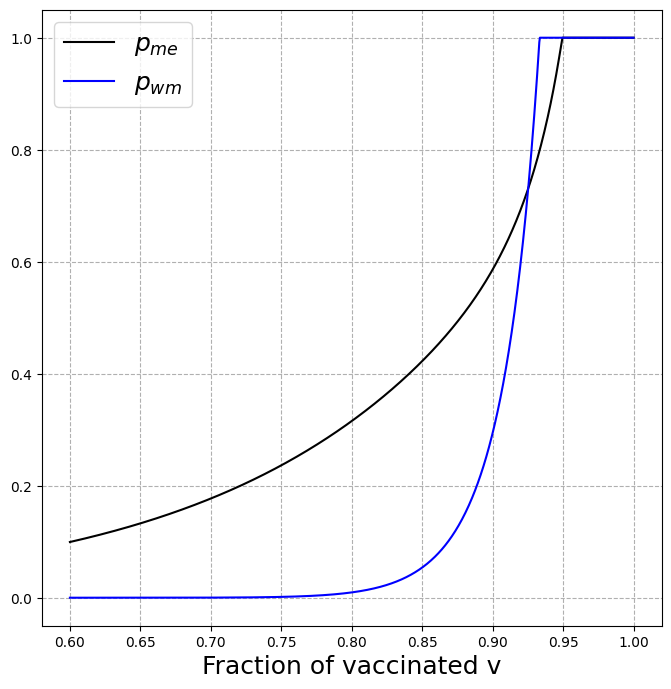

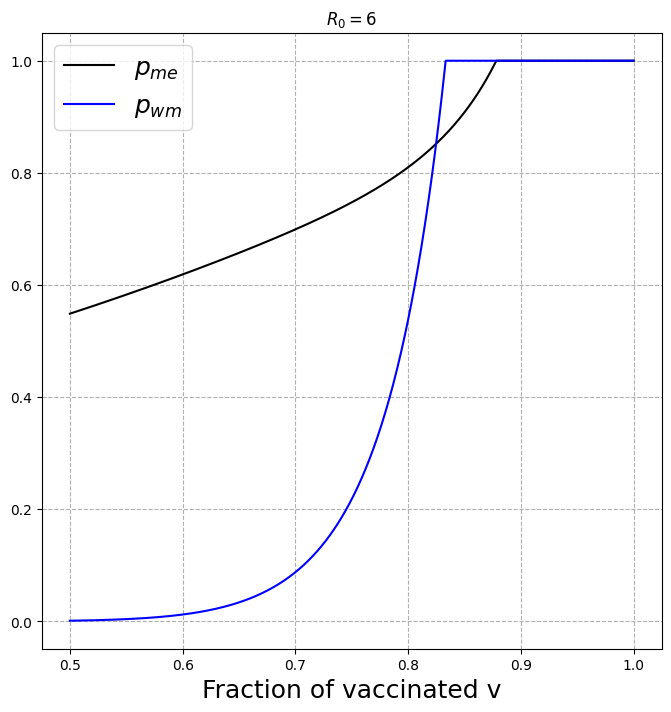

In [19]:
import numpy as np
from scipy import optimize
import math
import numpy as np
import matplotlib.pyplot as plt

def f(x, v, pi,R0): #function to find $p_{me}$ as the solution of a fixed point equation
  u=(1-v)/(1-pi)
  z=x*(x*u+1-u)**(nc-1) #corresponds to $\Bar{q}$ in the paper
  lambdaG=(R0**2)/(R0+nc-1) #rate of global contacts
  return np.exp(-lambdaG*(1-v)*(1-z))

def fun(x, v): #function to find $p_{wm}$
  y=x*(x*(1-v)+v)**(nc-1)
  return y

#plot with R0=15
v=np.linspace(0.6,1,1000) #fraction of vaccinated
pi=0.5 #fraction of schools with the vaccine mandate
nc=25 #number of students per class
X=[]
X1=[]
Y=[]
for i in range(len(v)):
  X.append(optimize.fixed_point(f, 0.4, args=(v[i],pi,15)))
  X1.append(optimize.fixed_point(f, 0.4, args=(v[i],0,15))) # x|_{\pi=0}
  Y.append(fun(X1[i],v[i]))

#Checking for crossing point between p_me and p_wm:
i=0
while X[i]>Y[i] and X[i+1]>Y[i+1]:
  i+=1
print(r'the crossing between $p_{me}$ and $p_{wm}$ when $R_0=15$ is for $v=$',v[i])
#the crossing is at around 0.925

#Checking for the v value for which p_me reaches 1:
i=0
while X[i]<1 and X[i+1]<1:
  i+=1
print(r'$p_{me}$ reaches 1 for $v=$', v[i])
#it is for v around 0.95

#Checking for the v value for which p_wm reaches 1:
i=0
while Y[i]<1 and Y[i+1]<1:
  i+=1
print(r'$p_{wm}$ reaches 1 for $v=$',v[i])
#it is for v around 0.933

plt.figure(figsize=(8,8))
plt.plot(v,X,'k', label=r'$p_{me}$')
plt.plot(v,Y,'b', label=r'$p_{wm}$')
plt.grid(ls='--')
plt.xlabel('Fraction of vaccinated v', fontsize=18)
plt.legend(fontsize=18)




#---------------------------------------------------------------------------------
#plot with R0=6
v=np.linspace(0.5,1,1000) #fraction of vaccinated
pi=0.5 #fraction of schools with the vaccine mandate
nc=25 #number of students per class
X=[]
X1=[]
Y=[]
for i in range(len(v)):
  X.append(optimize.fixed_point(f, 0.4, args=(v[i],pi,6)))
  X1.append(optimize.fixed_point(f, 0.4, args=(v[i],0,6))) # x|_{\pi=0}
  Y.append(fun(X1[i],v[i]))

#Checking for crossing point:
i=0
while X[i]>Y[i] and X[i+1]>Y[i+1]:
  i+=1
print(r'the crossing between $p_{me}$ and $p_{wm}$ when $R_0=6$ is for $v=$',v[i])
#the crossing is at around 0.82

#Checking for the v value for which p_me reaches 1:
i=0
while X[i]<1 and X[i+1]<1:
  i+=1
print(r'$p_{me}$ reaches 1 for $v=$', v[i])
#it is for v around 0.88

#Checking for the v value for which p_wm reaches 1:
i=0
while Y[i]<1 and Y[i+1]<1:
  i+=1
print(r'$p_{wm}$ reaches 1 for $v=$',v[i])
#it is for v around 0.83


plt.figure(figsize=(8,8))
plt.plot(v,X,'k', label=r'$p_{me}$')
plt.plot(v,Y,'b', label=r'$p_{wm}$')
plt.grid(ls='--')
plt.xlabel('Fraction of vaccinated v', fontsize=18)
plt.title('$R_0=6$')
plt.legend(fontsize=18)